<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Visualização de Dados II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Distribuições: Histograma, KDE e Box Plot;</li>
  <li>Correlação: Gráfico de Disperção e Mapa de Calor.</li>
</ol>

---

# **Exercícios**

Nestes exercícios, você deve decidir qual é o gráfico visto em aula que melhor visualiza uma base de dados. Após decidir, você deverá criar a visualização usando o conteúdo exposto durante a aula e adicionar um pequeno parágrafo sobre um insights que pode ser extraido do gráfico.

## 1\. Preços `outliers` de diamante

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


[Text(0.5, 1.0, 'Preços outliers de diamante'), Text(0.5, 0, 'preço')]

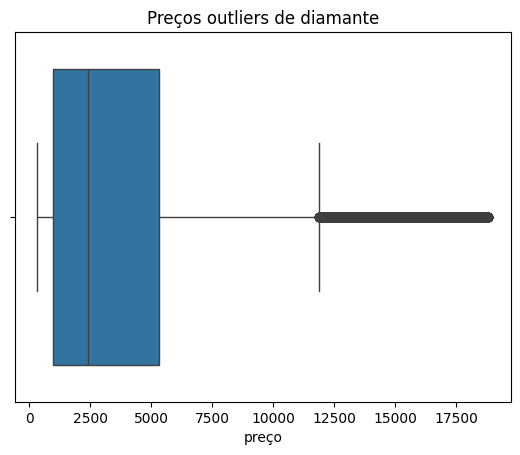

In [8]:
# gráfico do exercício 1

diamonds = sns.boxplot(x=data['price'])
diamonds.set(title='Preços outliers de diamante', xlabel='preço')

**Insight do gráfico 1**: os valores estão mais acumulados entre um pouco mais que zero e 5 mil e cem  ou 5 mil e duzentos, os valores iniciam em 0 e vão até quase 12 mil, e os outliers começam em quase 12 mil e ultrapassam os 17500

---

## 2\. Correlação entre o do preço do diamante com seu peso (`carat`) agrupados por sua transparêcia (`clarity`)

In [9]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [10]:
diamonds = data[['price','carat', 'clarity']]
diamonds.head()

,price,carat,clarity
0,326,0.23,SI2
1,326,0.21,SI1
2,327,0.23,VS1
3,334,0.29,VS2
4,335,0.31,SI2


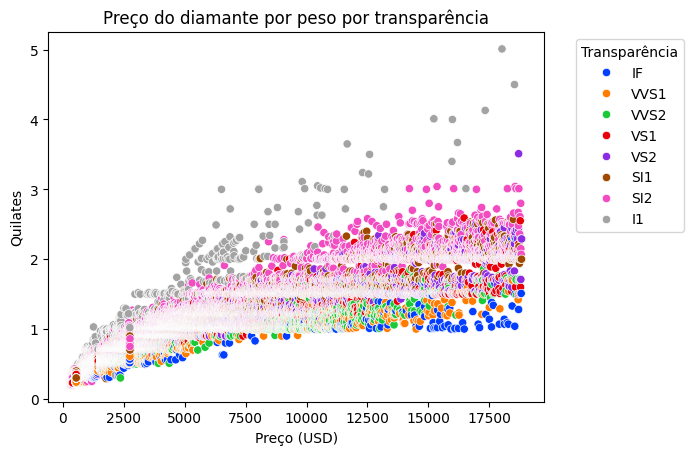

In [11]:
# gráfico do exercício 2

grafico = sns.scatterplot(data=diamonds, x="price", y="carat", hue="clarity", palette="bright")
grafico.set(title='Preço do diamante por peso por transparência', xlabel='Preço (USD)', ylabel='Quilates');
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Transparência"); # Adicionando título a legenda e realocada para fora do gráfico


**Insight do gráfico 2**: diamantes mais pesados e mais transparentes são mais caros , logo intereferem diretamente no preço, porem outras caracteristicas podem interferir no valor.

---

## 3\. Distribuição contínua aproximada do peso (`weight`) de carros

In [12]:
import seaborn as sns

data = sns.load_dataset("mpg")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


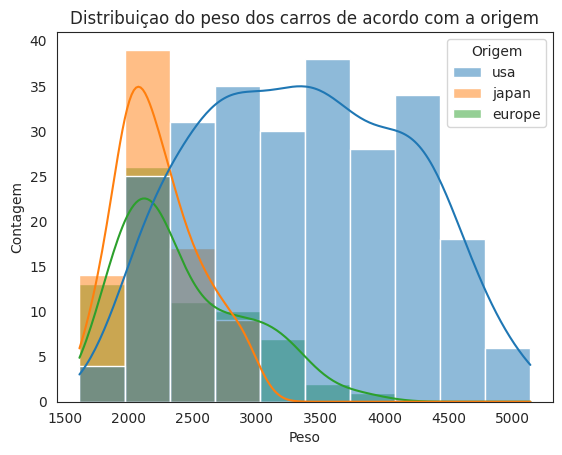

In [13]:
# gráfico do exercício 3

cars = data[["weight", "origin"]]

with sns.axes_style("white"):
  grafico = sns.histplot(data=cars, x="weight", hue="origin", kde=True)
  grafico.set(title="Distribuiçao do peso dos carros de acordo com a origem", xlabel="Peso", ylabel="Contagem");
  grafico.get_legend().set_title("Origem");

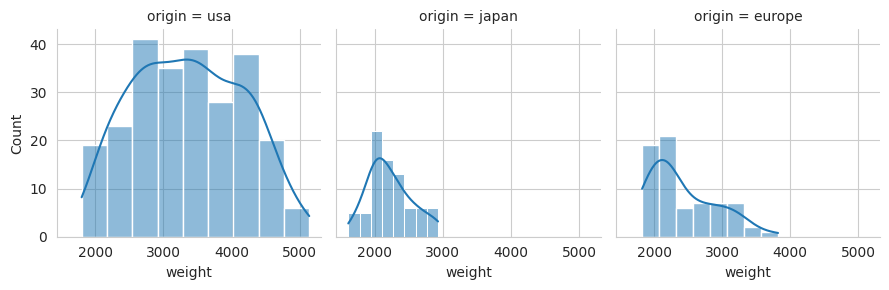

In [14]:
cars = data[["weight", "origin"]]

with sns.axes_style('whitegrid'):

  grafico = sns.FacetGrid(data=cars, col="origin")
  grafico.map(sns.histplot, "weight", kde=True)

**Insight do gráfico 3**: ...

podemos ver que os eua fazem carros pesados , então se o peso for maior que 3000 provavelmente sera feito por eles , e se for de 4000 pra cimar 100% de certeza que sera deles pois só ele fazem carros tão pesados.
se tirarmos o eua da comparação a briga fica mais acirrada, com japão e europa tendo a maioria dos seus carros feitos perto dos 2000  de peso, porem o japão não produz nenhum carro acima de 3000 , ja a europa sim, porem bem poucos, vendo assim parece que o japão vende mais carros que a europa .

---